In [1]:
import numpy as np
from PIL import Image as Img
import matplotlib.pyplot as plt
import cv2
import math
from lloyd_python import lloyds

In [2]:
def uniform_quan(im, s):
    output = np.zeros(np.shape(im))
    for i in range(len(im)):
        for j in range(len(im[0])):
            output[i][j] = int((im[i][j]+1)/pow(2, 8-s))
            
    return output

In [3]:
diver = cv2.imread("diver.tif")
lena = cv2.imread("lena512.tif")
grayd = cv2.cvtColor(diver, cv2.COLOR_BGR2GRAY)
grayl = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
msed = []
msel = []
for s in range(1,8):
    unid = uniform_quan(grayd[:], s)
    unil = uniform_quan(grayl[:], s)
    
    unid1 = np.zeros(np.shape(unid))
    unid1 = cv2.normalize(unid, unid1, 0, 255, cv2.NORM_MINMAX)
    unil1 = np.zeros(np.shape(unil))
    unil1 = cv2.normalize(unil, unil1, 0, 255, cv2.NORM_MINMAX)
    
    sumd = 0
    for i in range(len(unid)):
        for j in range(len(unid[0])):
            sumd += pow(unid1[i][j] - grayd[i][j], 2)
    msed.append(sumd/(len(unid)*len(unid[0])))
    
    suml = 0
    for i in range(len(unil)):
        for j in range(len(unil[0])):
            suml += pow(unil1[i][j] - grayl[i][j], 2)
    msel.append(suml/(len(unil)*len(unil[0])))

In [4]:
trainingsetd = np.reshape(grayd, (len(grayd)*len(grayd[0]), 1))
partitiond = []
codebookd = []
for s in range(2,9):
    p, c = lloyds(trainingsetd, [s])
    partitiond.append(p)
    codebookd.append(c)

mselld = []
aread = len(grayd) * len(grayd[0])
areal = len(grayl) * len(grayl[0])
for a in range(7):
    Sum = 0
    for i in range(len(grayd)):
        for j in range(len(grayd[0])):
            part = -1
            for p in reversed(range(len(partitiond[a]))):
                if grayd[i][j]>partitiond[a][p]:
                    part = p
                    break
            Sum += pow(grayd[i][j] - codebookd[a][part+1], 2)
    mselld.append(Sum/aread)

In [5]:
trainingsetl = np.reshape(grayl, (len(grayl)*len(grayl[0]), 1))
partitionl = []
codebookl = []
for s in range(2,9):
    p, c = lloyds(trainingsetl, [s])
    partitionl.append(p)
    codebookl.append(c)
    
mselll = []
for a in range(7):
    Sum = 0
    for i in range(len(grayl)):
        for j in range(len(grayl[0])):
            part = -1
            for p in reversed(range(len(partitionl[a]))):
                if grayl[i][j]>partitionl[a][p]:
                    part = p
                    break
            Sum += pow(grayl[i][j] - codebookl[a][part+1], 2)
    mselll.append(Sum/areal)

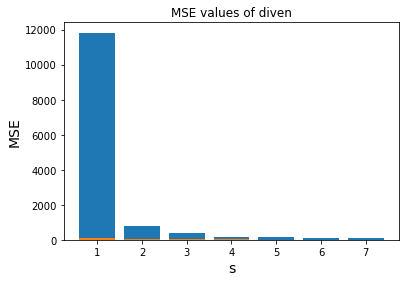

In [6]:
plt.bar(range(1,8), msed)
plt.bar(range(1,8), mselld)
plt.title("MSE values of diven")
plt.xlabel("s", size=14)
plt.ylabel("MSE", size=14)
plt.show()

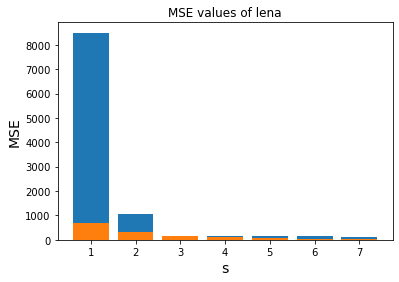

In [7]:
plt.bar(range(1,8), msel)
plt.bar(range(1,8), mselll)
plt.title("MSE values of lena")
plt.xlabel("s", size=14)
plt.ylabel("MSE", size=14)
plt.show()

In [8]:
HEd = cv2.equalizeHist(grayd)
HEl = cv2.equalizeHist(grayl)

In [9]:
trainingsetd = np.reshape(HEd, (len(HEd)*len(HEd[0]), 1))
partitiond = []
codebookd = []
for s in range(2,9):
    p, c = lloyds(trainingsetd, [s])
    partitiond.append(p)
    codebookd.append(c)

mselld = []
for a in range(7):
    Sum = 0
    for i in range(len(grayd)):
        for j in range(len(grayd[0])):
            part = -1
            for p in reversed(range(len(partitiond[a]))):
                if HEd[i][j]>partitiond[a][p]:
                    part = p
                    break
            Sum += pow(HEd[i][j] - codebookd[a][part+1], 2)
    mselld.append(Sum/aread)

In [10]:
trainingsetl = np.reshape(HEl, (len(HEl)*len(HEl[0]), 1))
partitionl = []
codebookl = []
for s in range(2,9):
    p, c = lloyds(trainingsetl, [s])
    partitionl.append(p)
    codebookl.append(c)

mselll = []
for a in range(7):
    Sum = 0
    for i in range(len(grayl)):
        for j in range(len(grayl[0])):
            part = -1
            for p in reversed(range(len(partitionl[a]))):
                if HEl[i][j]>partitionl[a][p]:
                    part = p
                    break
            Sum += pow(HEl[i][j] - codebookl[a][part+1], 2)
    mselll.append(Sum/aread)

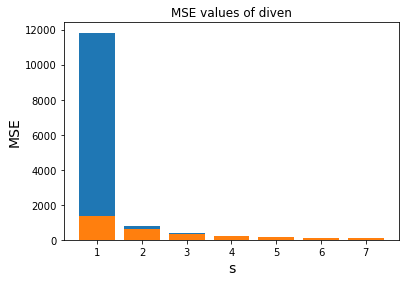

In [11]:
plt.bar(range(1,8), msed)
plt.bar(range(1,8), mselld)
plt.title("MSE values of diven")
plt.xlabel("s", size=14)
plt.ylabel("MSE", size=14)
plt.show()

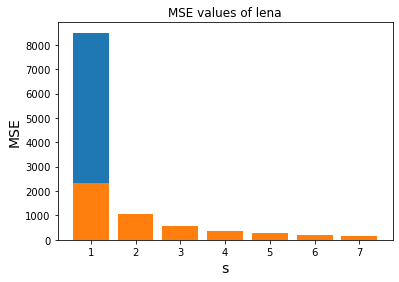

In [12]:
plt.bar(range(1,8), msel)
plt.bar(range(1,8), mselll)
plt.title("MSE values of lena")
plt.xlabel("s", size=14)
plt.ylabel("MSE", size=14)
plt.show()